In [1]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from wordcloud import WordCloud
import math
from datetime import datetime

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stopwords = stopwords.words('english')

import warnings
warnings.filterwarnings("ignore")

In [2]:
def json_to_dict(strings):
    try:
        strings = literal_eval(strings.replace("[", "").replace("]", ""))
    except:
        strings = "NaN"
    return strings

In [3]:
def tokenize(sentence):
    try:
        sentence = sentence.lower()
        out = sentence.translate(str.maketrans('', '', string.punctuation))
        out = word_tokenize(out)
        lemmatizer = WordNetLemmatizer()
        out = [lemmatizer.lemmatize(item) for item in out if item not in stopwords and not item.isdigit()]
    except:
        out = []
    return out

# Plot Functions

In [4]:
def histogram(value, title, x_title, y_title):
    plt.figure(figsize=(15, 5))
    plt.hist(value)
    plt.title(title)
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.show()

In [5]:
def box(value, title, name=None, x_label = None):
    plt.figure(figsize=(15, 5))
    plt.boxplot(value)
    if name != None:
        plt.xticks(range(1, len(name)+1), name, rotation=90)
    plt.title(title)
    
    plt.show()

In [6]:
def bar(value, title, x_title, y_title):
    plt.figure(figsize=(15, 5))
    plt.hist(value)
    plt.title(title)
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.show()

In [7]:
def scatter(x_, y_, x_title, y_title):
    plt.figure(figsize=(15, 10))
    plt.scatter(x = x_, y = y_)
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.show()

In [8]:
def wordcloud(alist):
    unique_string=(" ").join(alist)
    wordcloud = WordCloud(width = 1000, height = 500, background_color='white').generate(unique_string)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.tight_layout(pad=0)
    plt.axis("off")
    plt.show()

# Data Info

In [9]:
'''
loading data
'''
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [10]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [11]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

# Data Exploraton

因為原本revenue的分布呈現右偏分布，因此我們增加一個欄位為取對數後的revenue，使分布調整為接近常態分布

In [12]:
train['Logged_Revenue'] = train['revenue'].apply(lambda x: math.log(x))

針對belong_to_collection屬性，我們列出前19個出現頻率最高的collection

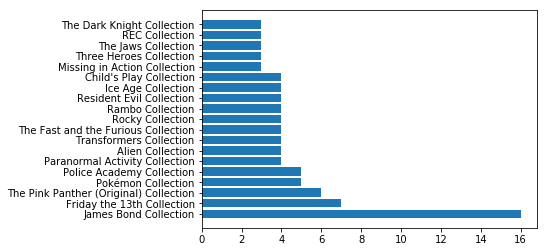

In [13]:
belongs_to_collection = []
for item in list(train['belongs_to_collection']):
    item = json_to_dict(item)
    try:
        item = item['name']
    except:
        pass
    belongs_to_collection.append(item)
train['belongs'] = belongs_to_collection
belongs = pd.DataFrame(belongs_to_collection)
belongs = belongs[0].value_counts()[1:20]
belongs = pd.DataFrame(belongs)
fig, ax = plt.subplots()
ax.barh(belongs.index, belongs[0])
plt.show()

緊接著我們去觀察這19個最頻繁出現的collection與我們的目標變數revenue之間的關聯，可以發現Dark Knight Collection是平均revenue最高的collection，而Transofrmers collection在revenue上的分布是集中偏高的。
下圖為collection與logged revenue之間的關聯，與上圖相比各區間的相對位置仍然維持，但是修正了原本各個collection分布位置偏低的狀況。

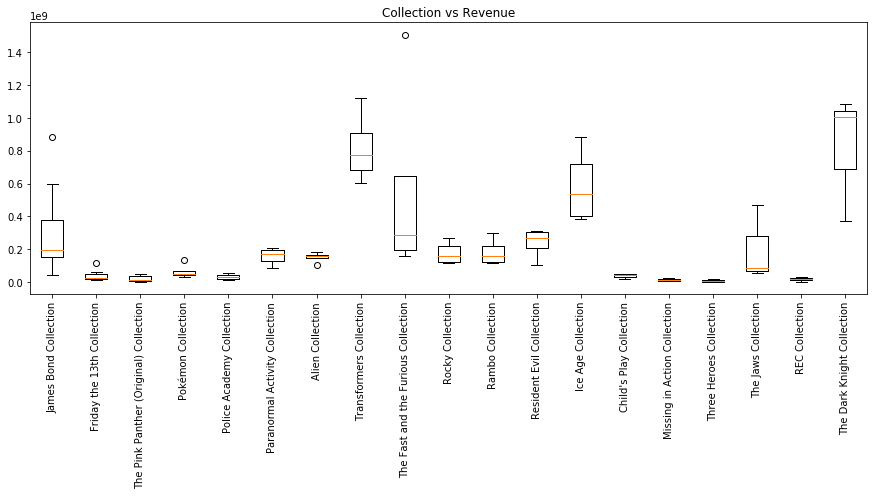

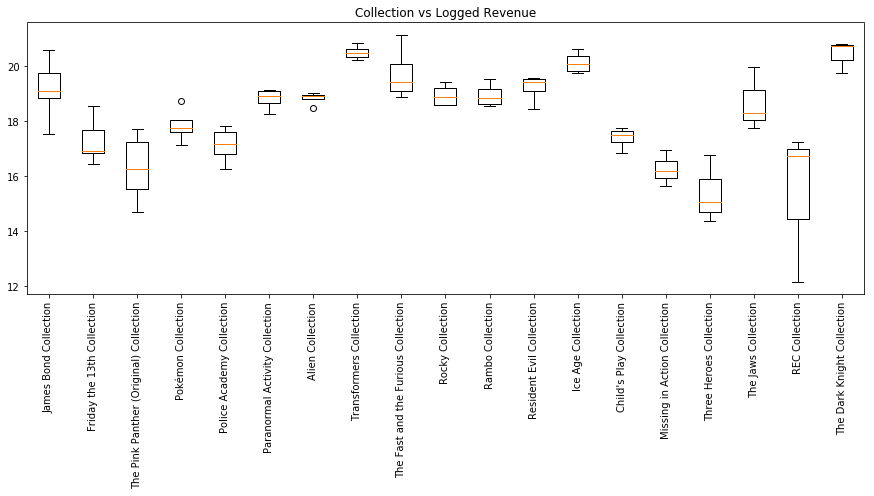

In [14]:
rev = []
for item in list(belongs.index):
    rev.append(list(train[train.belongs == item]['revenue']))
box(value=rev, title="Collection vs Revenue", name=list(belongs.index))

rev = []
for item in list(belongs.index):
    rev.append(list(train[train.belongs == item]['Logged_Revenue']))
box(value=rev, title="Collection vs Logged Revenue", name=list(belongs.index))

針對budget屬性，我們使用盒鬚圖與長條圖來觀察其分布，發現其分布也是呈現右偏分布，因此我們也將budget取log將分布修正成接近常態分佈

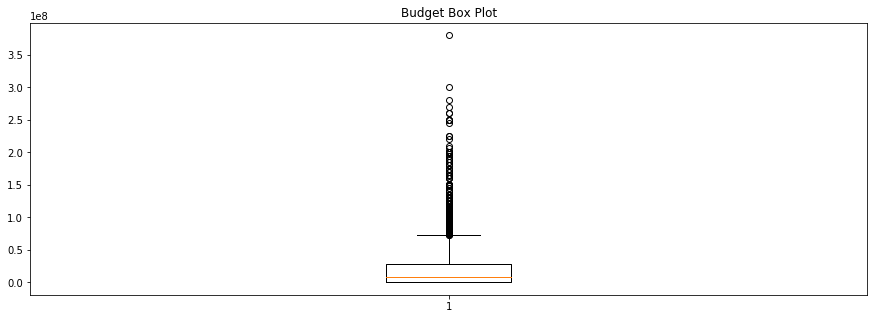

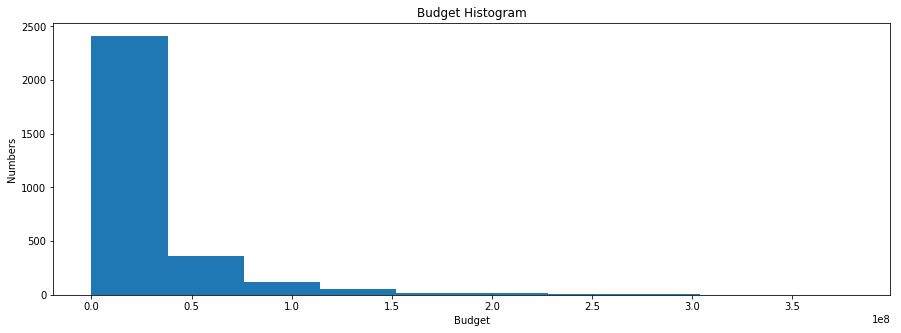

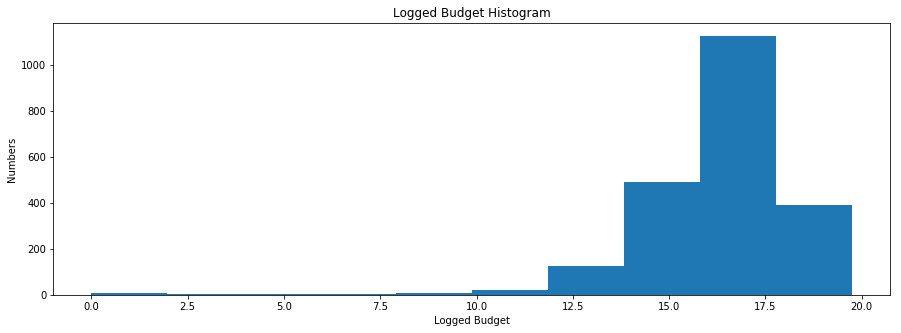

In [15]:
box(value = train.budget, title = "Budget Box Plot")
histogram(value = train.budget, title = "Budget Histogram", x_title = "Budget", y_title = "Numbers")
histogram(value = [math.log(budg) for budg in list(train.budget) if budg != 0],\
          title = "Logged Budget Histogram", x_title = "Logged Budget", y_title = "Numbers")

接著我們想觀察logged budget與logged revenue之間的關聯，因此使用散布圖來視覺化，結果可以發現logged budget與logged revenue之間呈現正相關的關聯。

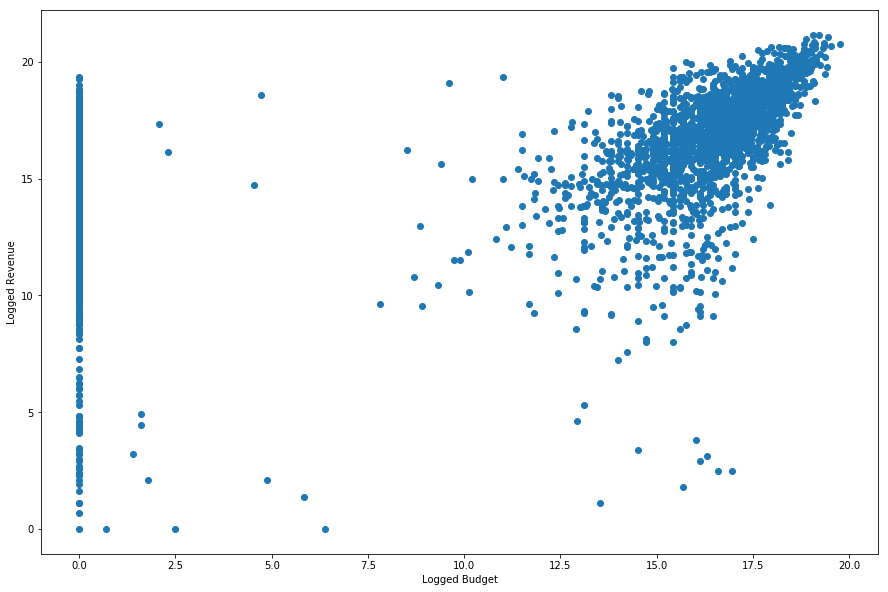

In [16]:
bud = []
for item in list(train['budget']):
    try:
        item = math.log(item)
    except:
        item = 0
    bud.append(item)
train['bud'] = bud
scatter(x_ = train.bud, y_ = train.Logged_Revenue, x_title = "Logged Budget", y_title = "Logged Revenue")

針對Genre屬性我們首先列出前19個常出現的類型，可以發現Drama類型的電影出現次數最多。

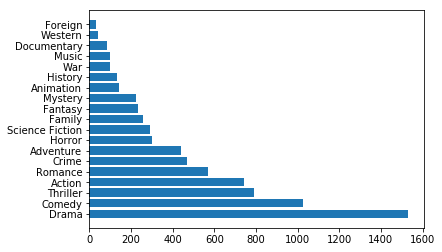

In [17]:
genre = []
for item in list(train['genres']):
    item = json_to_dict(item)
    try:
        item = item['name']
        genre.append(item)
    except:
        for it in item:
            try:
                it = it['name']
            except:
                pass
            genre.append(it)
    
genre = pd.DataFrame(genre)
genre = genre[0].value_counts()[:19]
genre = pd.DataFrame(genre)
genre
fig, ax = plt.subplots()
ax.barh(genre.index, genre[0])
plt.show()

緊接著我們對Genre屬性與目標變數revenue跟logged revenue來作圖，可以發現除了Documentary類型和Foreign類型的電影明顯的revenue偏低，其他類型的電影與revenue好像沒什麼明顯的關聯。

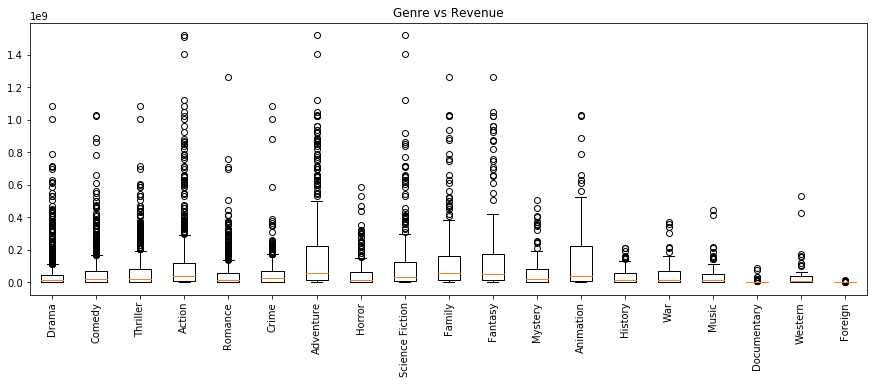

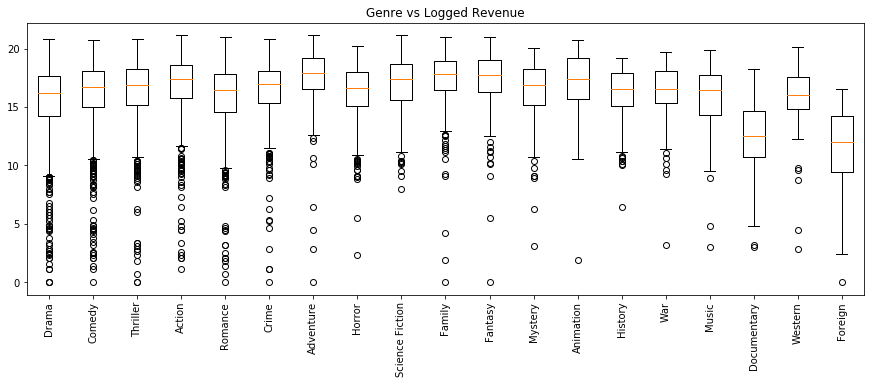

In [18]:
rev = []
non_nan = train[train.genres.notna()]
for item in list(genre.index):
    rev.append(list(non_nan[non_nan.genres.str.contains(item)]['revenue']))
box(value=rev, title="Genre vs Revenue", name=list(genre.index))

rev = []
for item in list(genre.index):
    rev.append(list(non_nan[non_nan.genres.str.contains(item)]['Logged_Revenue']))
box(value=rev, title="Genre vs Logged Revenue", name=list(genre.index))

針對homepage屬性與目標變數revenue跟logged revenue來作圖，可以發現電影有homepage更容易有更高的revenue

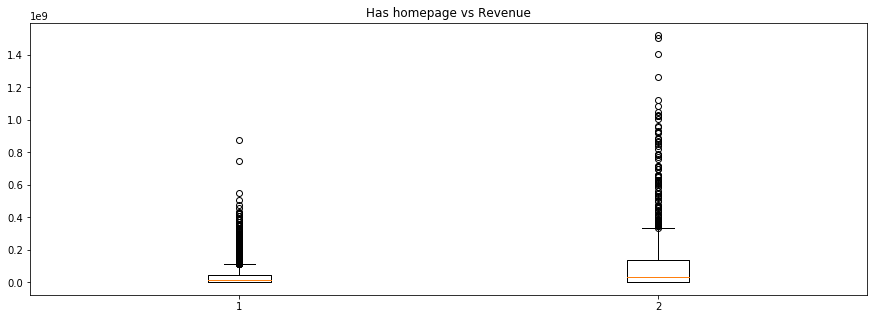

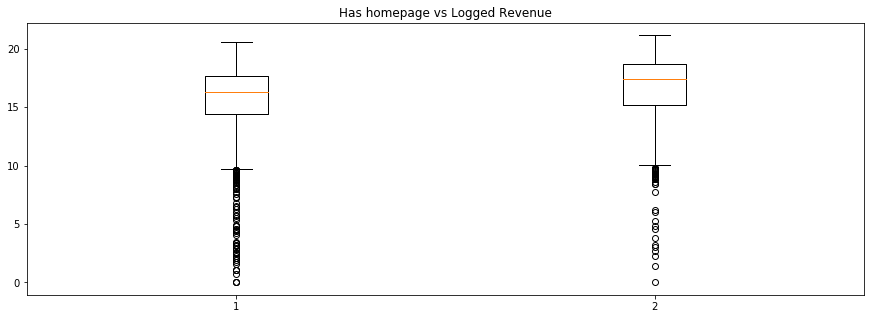

In [19]:
has = list(train[train.homepage.notna()]['revenue'])
nan = list(train[train.homepage.isna()]['revenue'])
box(value=[nan, has], title="Has homepage vs Revenue")

has = list(train[train.homepage.notna()]['Logged_Revenue'])
nan = list(train[train.homepage.isna()]['Logged_Revenue'])
box(value=[nan, has], title="Has homepage vs Logged Revenue")

針對original_language屬性，我們可以發現主要是英語電影為主

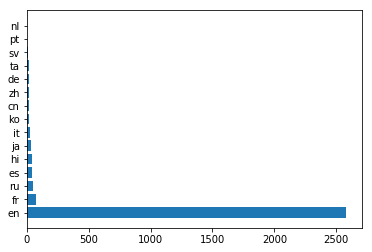

In [20]:
ori = train.original_language.value_counts()[:15]
ori = pd.DataFrame(ori)
fig, ax = plt.subplots()
ax.barh(ori.index, ori['original_language'])
plt.show()

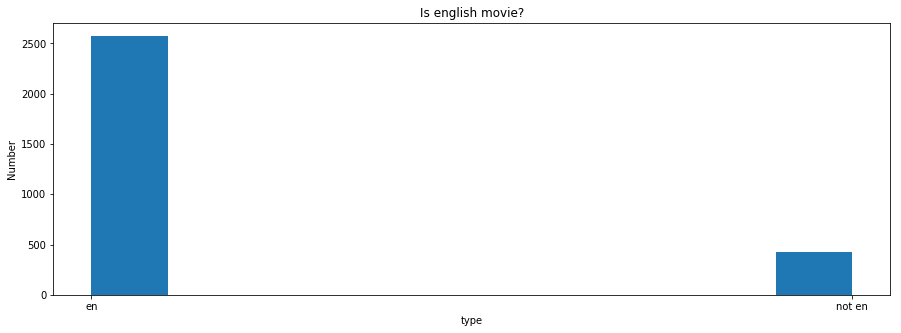

In [21]:
is_en = []
for item in list(train['original_language']):
    if item == 'en':
        is_en.append('en')
    else:
        is_en.append('not en')
# is_en = pd.DataFrame(is_en)
histogram(value = is_en, title="Is english movie?", x_title = "type", y_title = "Number")

接著我們對language屬性與目標變數revenue跟logged revenue來作圖，發現英語(en)電影有最高的收入而且平均revenue最高，而中文電影revenue的變異數最大。

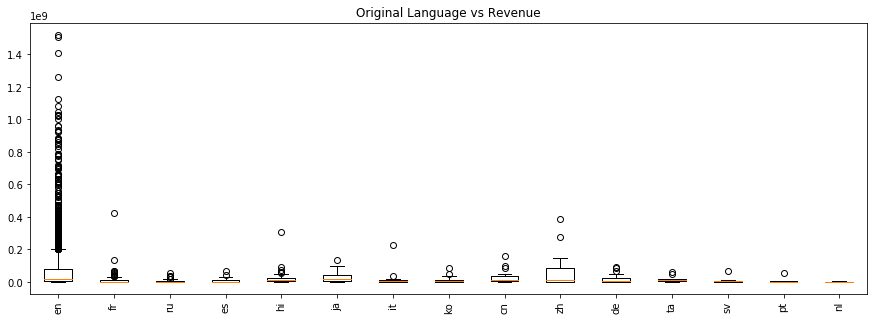

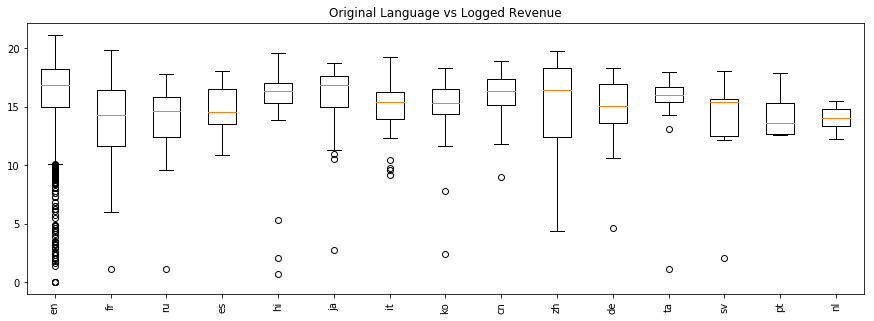

In [22]:
rev = []
non_nan = train[train.original_language.notna()]
for item in list(ori.index):
    rev.append(list(non_nan[non_nan.original_language.str.contains(item)]['revenue']))
box(value=rev, title="Original Language vs Revenue", name=list(ori.index))

rev = []
for item in list(ori.index):
    rev.append(list(non_nan[non_nan.original_language.str.contains(item)]['Logged_Revenue']))
box(value=rev, title="Original Language vs Logged Revenue", name=list(ori.index))

我們將Title屬性& Overview屬性 & Tagline屬性中出現的字繪製成文字雲圖

In [23]:
all_ = []
for item in list(train['title']):
    all_ = all_ + tokenize(item)
for item in list(train['overview']):
    all_ = all_ + tokenize(item)
for item in list(train['tagline']):
    all_ = all_ + tokenize(item)

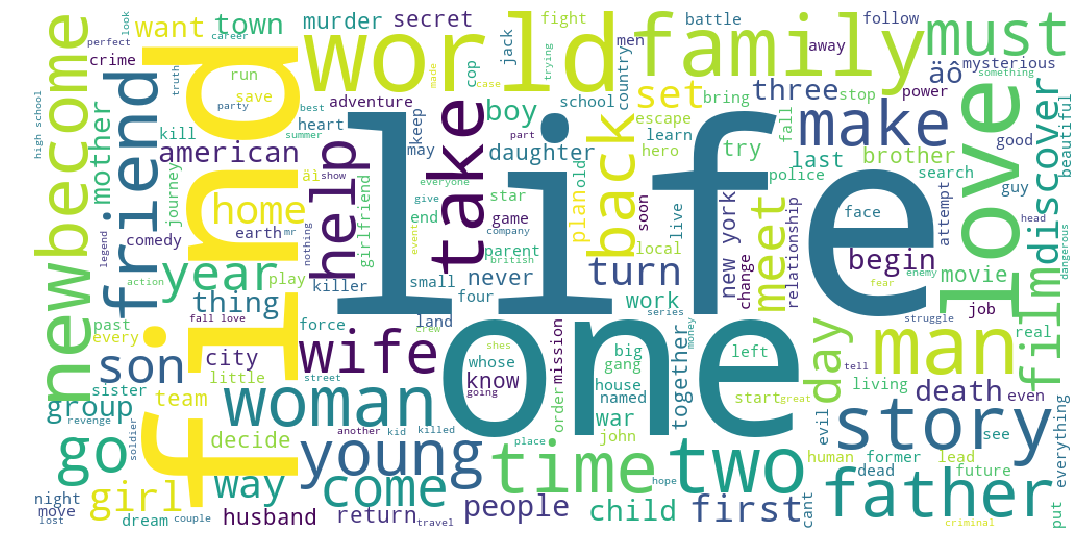

In [24]:
wordcloud(all_)

接著我們觀察overview屬性的長度與目標變數logged revenue之間的關聯，可以發現overview的長度通常越短revenue有比較大的趨勢。

In [25]:
len_overview = []
for item in list(train['overview']):
    len_overview.append(len(tokenize(item)))
train['overview_length'] = len_overview

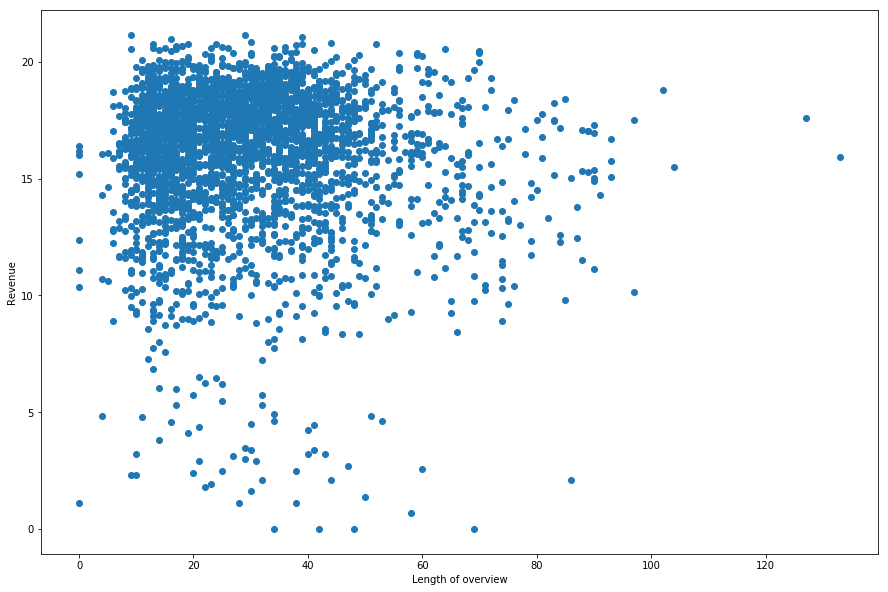

In [26]:
scatter(x_ = train['overview_length'], y_ = train['Logged_Revenue'], x_title = "Length of overview", y_title = "Revenue")

針對popularity屬性，我們使用盒鬚圖跟長條圖來觀察其分布，可以發現popularity也是呈現右偏分布，因此我們對popularity取對數將其修正為接近常態分布

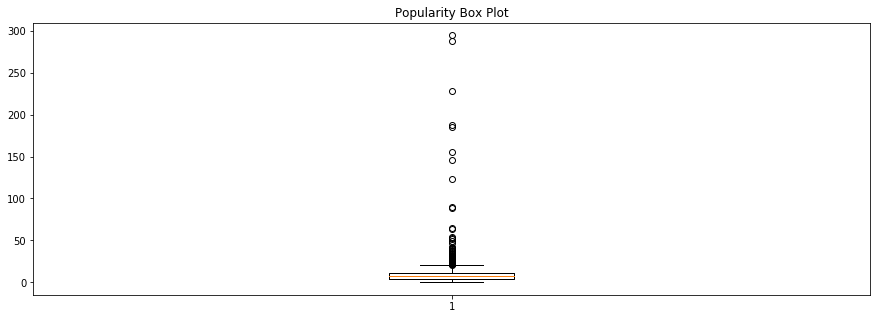

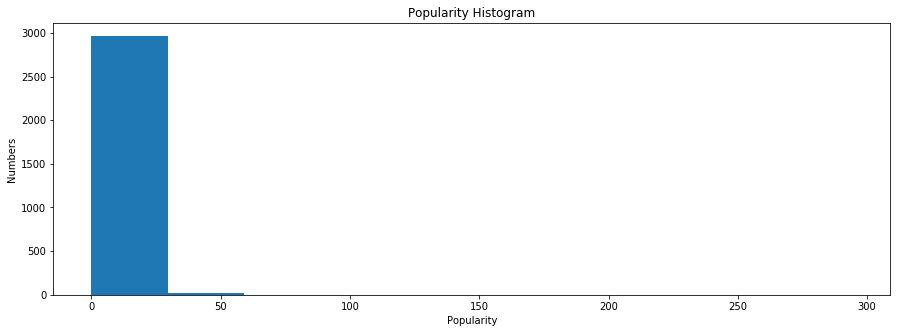

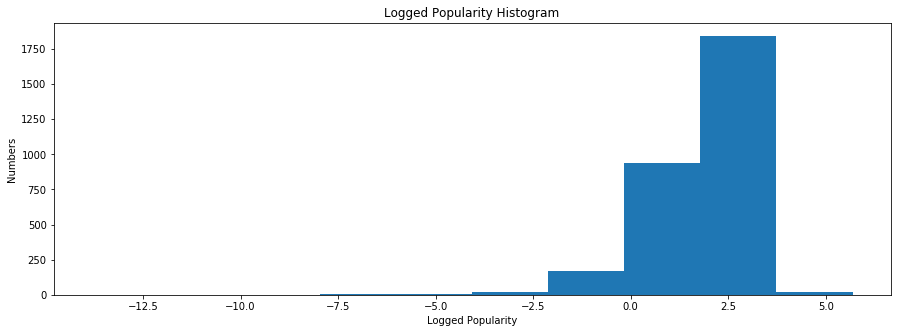

In [27]:
box(value = train.popularity, title = "Popularity Box Plot")
histogram(value = train.popularity, title = "Popularity Histogram", x_title = "Popularity", y_title = "Numbers")
histogram(value = [math.log(popu) for popu in list(train.popularity)],\
          title = "Logged Popularity Histogram", x_title = "Logged Popularity", y_title = "Numbers")

我們觀察logged popularity與目標變數logged revenue之間的關聯，可以發現兩者之間有正相關的關聯

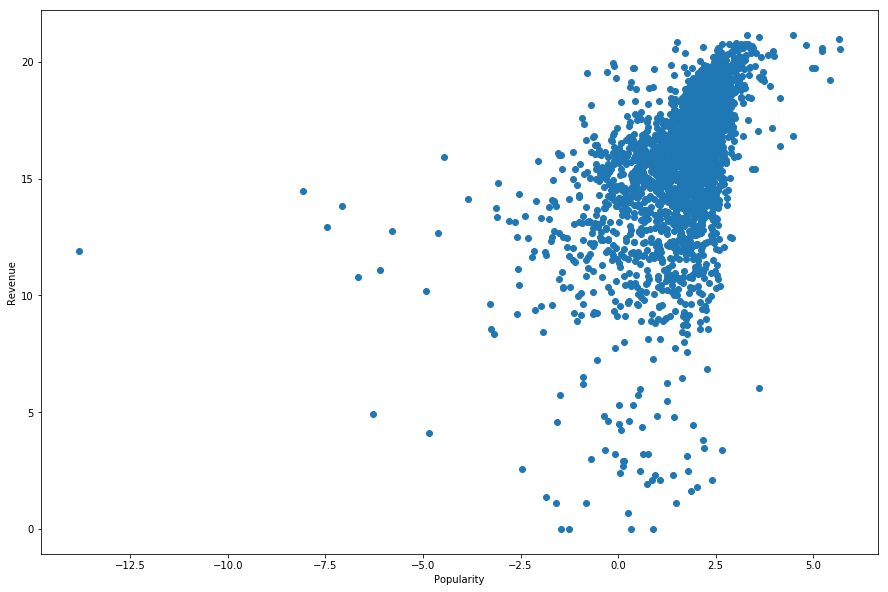

In [28]:
pop = []
for item in list(train['popularity']):
    try:
        item = math.log(item)
    except:
        item = 0
    pop.append(item)
train['pop'] = pop
len(train['pop']), len(train['Logged_Revenue'])
scatter(x_ = train['pop'], y_ = train['Logged_Revenue'], x_title = "Popularity", y_title = "Revenue")

針對production_companies屬性，我們列出了前15家最常出現的production companies。

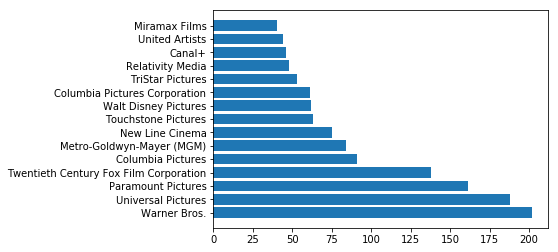

In [29]:
company = []
for item in list(train[train.production_companies.notna()]['production_companies']):
    item = json_to_dict(item)
    try:
        item = item['name']
        company.append(item)
    except:
        for it in item:
            try:
                it = it['name']
            except:
                pass
            company.append(it)
    
company = pd.DataFrame(company)
company = company[0].value_counts()[:15]
company = pd.DataFrame(company)
fig, ax = plt.subplots()
ax.barh(company.index, company[0])
plt.show()

接著我們對這15家公司與目標變數revenue跟logged revenue作圖來觀察其中的關聯，可以發現production companies與目標變數並沒有什麼太明顯的關聯存在。

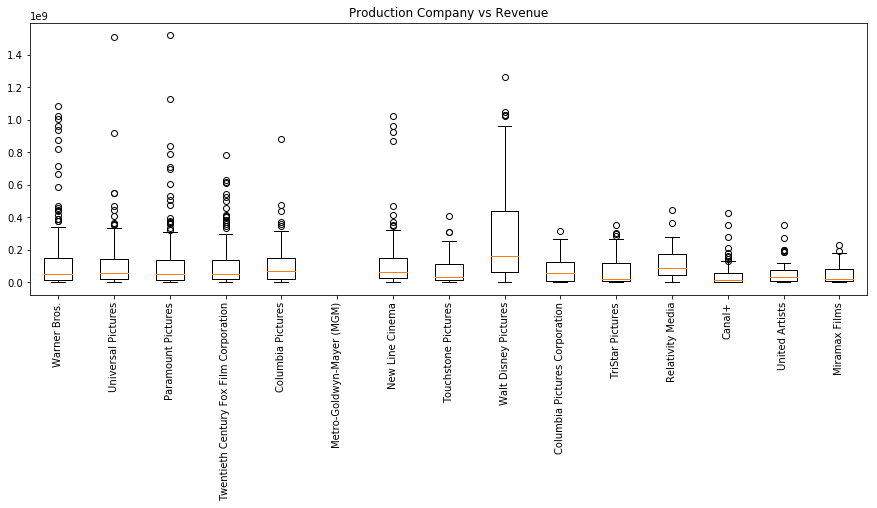

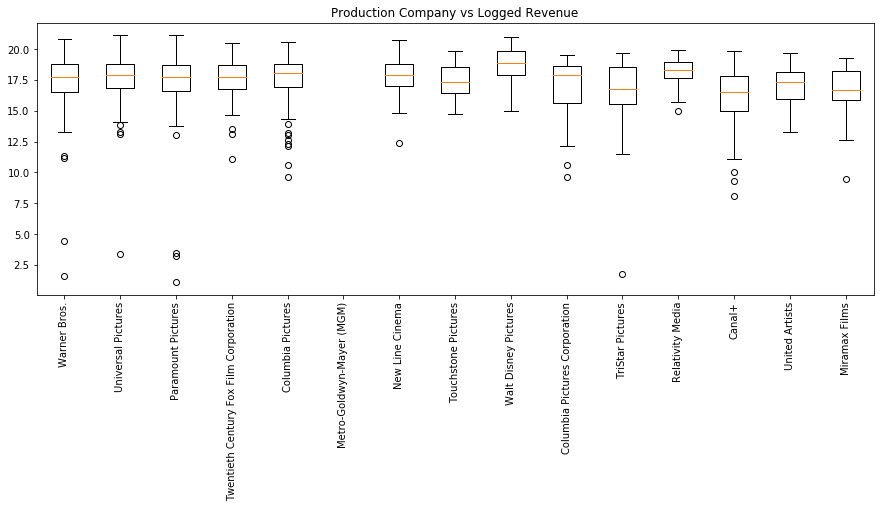

In [30]:
rev = []
non_nan = train[train.production_companies.notna()]
for item in list(company.index):
    rev.append(list(non_nan[non_nan.production_companies.str.contains(item)]['revenue']))
box(value=rev, title="Production Company vs Revenue", name=list(company.index))

rev = []
for item in list(company.index):
    rev.append(list(non_nan[non_nan.production_companies.str.contains(item)]['Logged_Revenue']))
box(value=rev, title="Production Company vs Logged Revenue", name=list(company.index))

針對production_countries屬性，我們可以發現USA是製片最多的國家。

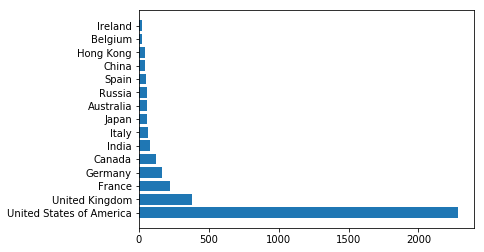

In [31]:
country = []
for item in list(train[train.production_countries.notna()]['production_countries']):
    item = json_to_dict(item)
    try:
        item = item['name']
        country.append(item)
    except:
        for it in item:
            try:
                it = it['name']
            except:
                pass
            country.append(it)
    
country = pd.DataFrame(country)
country = country[0].value_counts()[:15]
country = pd.DataFrame(country)
fig, ax = plt.subplots()
ax.barh(country.index, country[0])
plt.show()

接著我們對production contries屬性與目標變數revenue跟logged revenue作圖，可以發現其中並沒有什麼顯著的關聯存在。

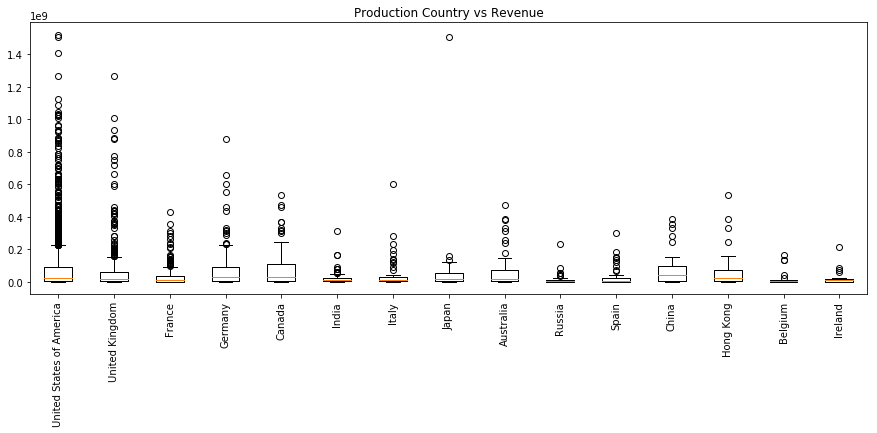

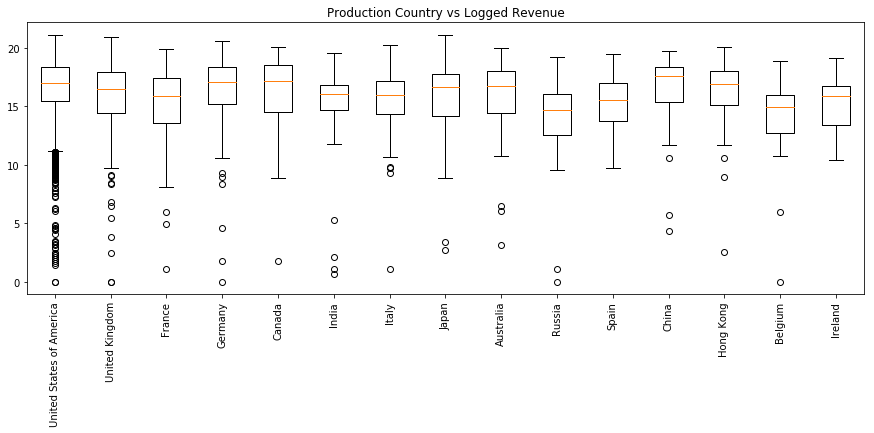

In [32]:
rev = []
non_nan = train[train.production_countries.notna()]
for item in list(country.index):
    rev.append(list(non_nan[non_nan.production_countries.str.contains(item)]['revenue']))
box(value=rev, title="Production Country vs Revenue", name=list(country.index))

rev = []
for item in list(country.index):
    rev.append(list(non_nan[non_nan.production_countries.str.contains(item)]['Logged_Revenue']))
box(value=rev, title="Production Country vs Logged Revenue", name=list(country.index))

針對release_date屬性的分布作圖，我們首先可以觀察到9月是最多電影發行的月份，再來對release_date屬性跟目標變數revenue作圖可以發現，在6、7、12的revenue普遍的比其他月份來的高。

In [33]:
release_month = []
for item in list(train['release_date']):
    item = list(item)
    try:
        item = item[0] + item[1]
        item = int(item)
    except:
        item = item[0]
        item = int(item)
    release_month.append(item)
train['release_month'] = release_month

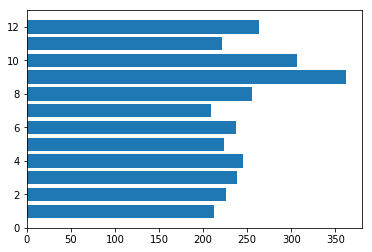

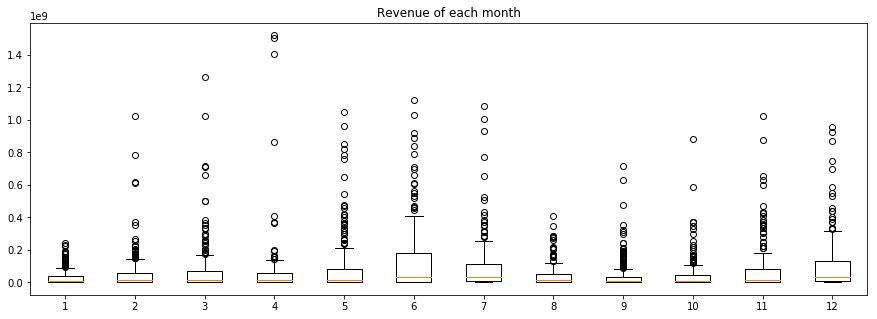

In [34]:
month = pd.DataFrame(release_month)
month = month[0].value_counts()[:15]
month = pd.DataFrame(month)
fig, ax = plt.subplots()
ax.barh(month.index, month[0])
plt.show()

data = []
for i in range(1, 13):
    rv_ = list(train[train.release_month == i]['revenue'])
    data.append(rv_)
box(value=data, title="Revenue of each month")

我們還另外討論一年中的第幾個week與目標變數revenue跟logged revenue之間的關聯，可以看到第37周(9月初)是電影發行數量最高的一周，而第53周發行的電影的revenue明顯是最差的一周。

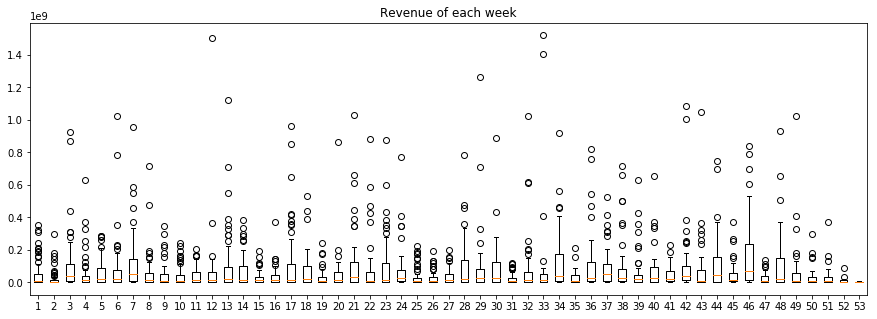

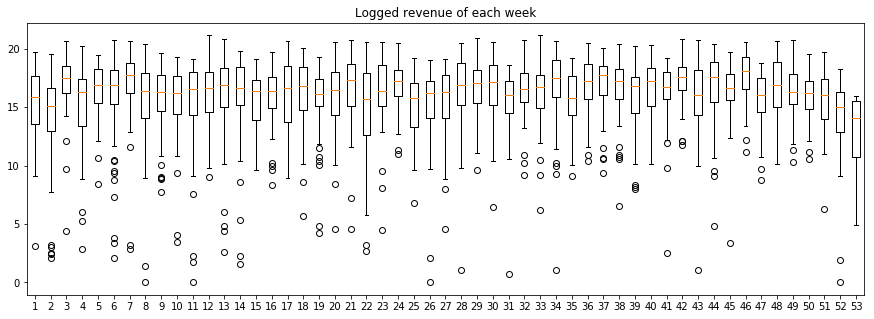

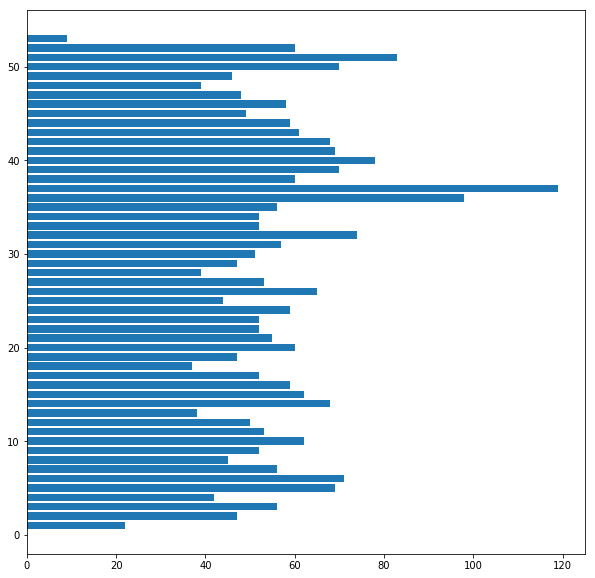

In [35]:
train['datetime'] = train.release_date.apply(lambda x: datetime.strptime(x, '%m/%d/%y'))
train['week'] = train.datetime.apply(lambda x: x.isocalendar()[1])
hist = train['week'].value_counts()
hist = pd.DataFrame(hist)

data = []
for i in list(hist.index):
    rv_ = list(train[train.week == i]['revenue'])
    data.append(rv_)
box(value=data, title="Revenue of each week")

data = []
for i in list(hist.index):
    rv_ = list(train[train.week == i]['Logged_Revenue'])
    data.append(rv_)
box(value=data, title="Logged revenue of each week")

# scatter(x_=train.week, y_=train.revenue, x_title="Week of Year", y_title="Revenue")

fig, ax = plt.subplots(figsize = (10, 10))
ax.barh(hist.index, hist['week'])
plt.show()

我們還另外討論一周的第幾天(weekday)與目標變數revenue、logged revenue之間的關聯，可以發現禮拜五是最多電影發行的日子，但是revenue跟weekday屬性卻是看不出顯著的關聯存在。

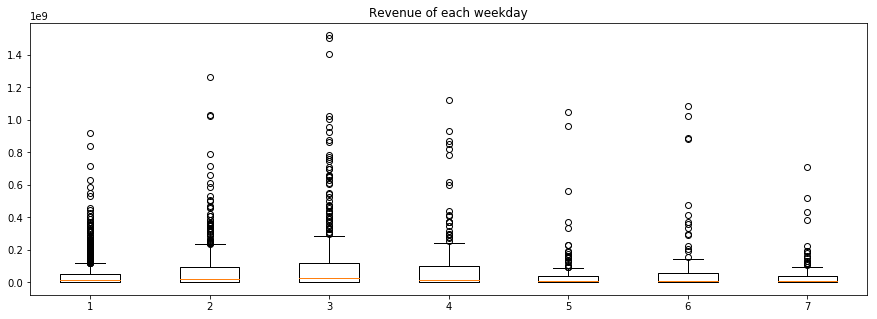

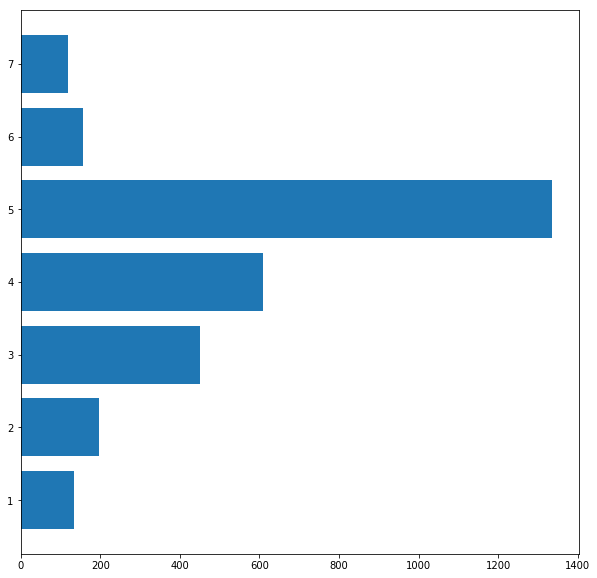

In [36]:
train['weekday'] = train.datetime.apply(lambda x: x.weekday()+1)
hist = train['weekday'].value_counts()
hist = pd.DataFrame(hist)

data = []
for i in list(hist.index):
    rv_ = list(train[train.weekday == i]['revenue'])
    data.append(rv_)
box(value=data, title="Revenue of each weekday")

data = []
for i in list(hist.index):
    rv_ = list(train[train.weekday == i]['Logged_Revenue'])
    data.append(rv_)

fig, ax = plt.subplots(figsize = (10, 10))
ax.barh(hist.index, hist['weekday'])
plt.show()

我們還另外討論哪一年(year)與目標變數revenue、logged revenue之間的關聯，可以看到2013年是發行最多電影的一年，但是revenue跟year屬性卻是看不出顯著的關聯存在。

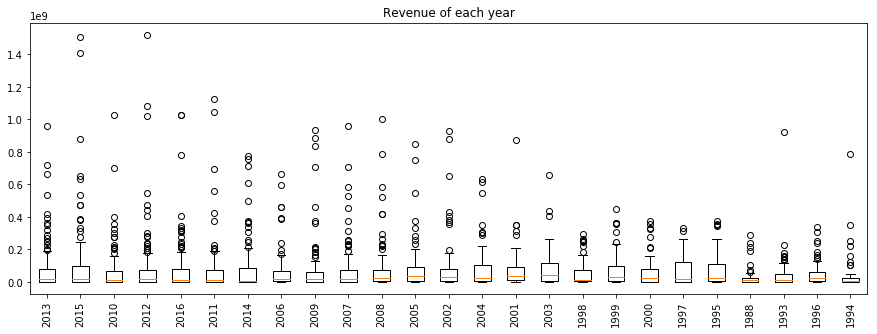

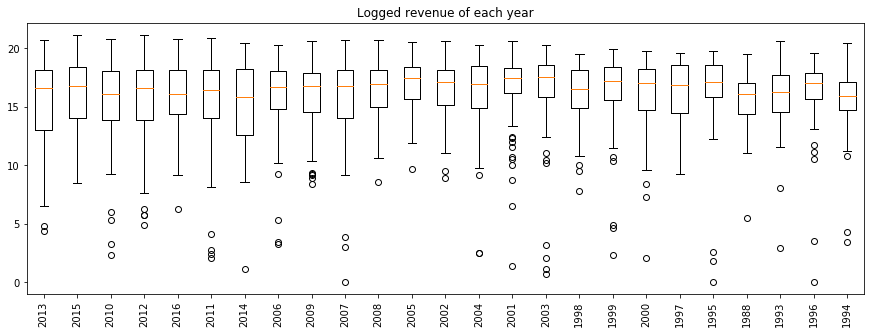

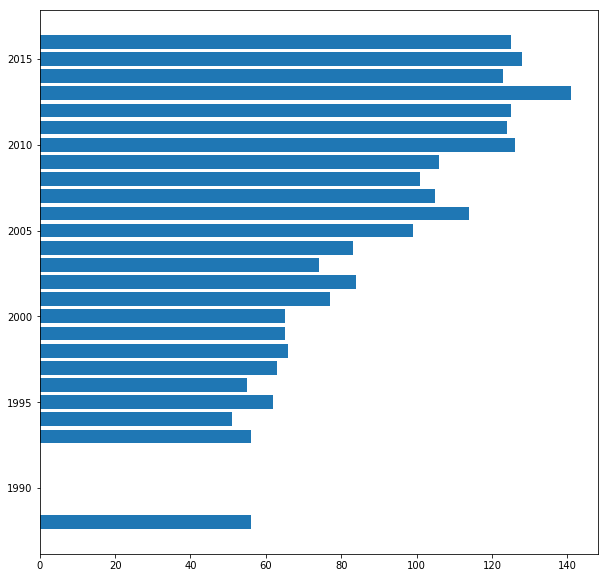

In [37]:
train['year'] = train.datetime.apply(lambda x: x.year)
hist = train['year'].value_counts()[:25]
hist = pd.DataFrame(hist)
hist

data = []
for i in list(hist.index):
    rv_ = list(train[train.year == i]['revenue'])
    data.append(rv_)
box(value=data, title="Revenue of each year", name=list(hist.index))

data = []
for i in list(hist.index):
    rv_ = list(train[train.year == i]['Logged_Revenue'])
    data.append(rv_)
box(value=data, title="Logged revenue of each year", name=list(hist.index))

fig, ax = plt.subplots(figsize = (10, 10))
ax.barh(hist.index, hist['year'])
plt.show()

針對runtime屬性我們使用盒鬚圖觀察其分布的狀況，可以發現電影的平均觀看時間大致上是100分鐘左右。

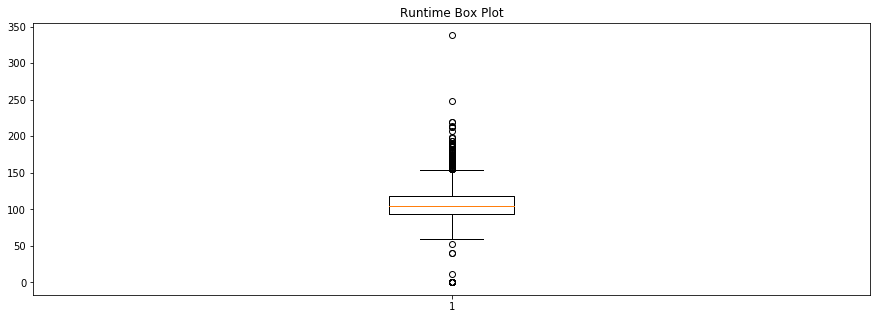

In [38]:
value = [int(item) for item in list(train[train.runtime.notna()].runtime)]
box(value = value, title="Runtime Box Plot")

接著我們對runtime屬性與目標變數logged revenue作圖，可以發現其中並沒有顯著的線性關係存在。

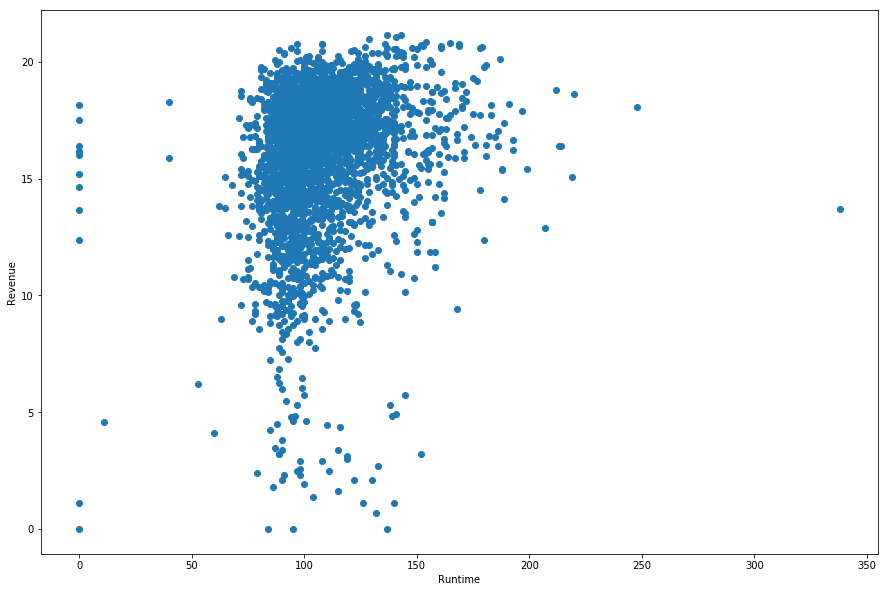

In [39]:
scatter(x_ = list(train['runtime']), y_ = list(train['Logged_Revenue']), x_title="Runtime", y_title="Revenue")

針對spoken_languages屬性，可以看出英語電影是出現次數最多的種類。

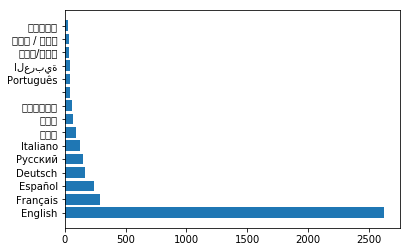

In [40]:
language = []
for item in list(train[train.spoken_languages.notna()]['spoken_languages']):
    item = json_to_dict(item)
    try:
        item = item['name']
        language.append(item)
    except:
        for it in item:
            try:
                it = it['name']
            except:
                pass
            language.append(it)
    
language = pd.DataFrame(language)
language = language[0].value_counts()[:15]
language = pd.DataFrame(language)
fig, ax = plt.subplots()
ax.barh(language.index, language[0])
plt.show()

針對status屬性，其屬性值絕大部分都是released，因此這個屬性是非常不具鑑別力的屬性，我們在訓練過程中不會使用該屬性。

In [41]:
train['status'].value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

針對Keywords屬性，我們可以觀察到woman director這個關鍵字出現次數最為頻繁。

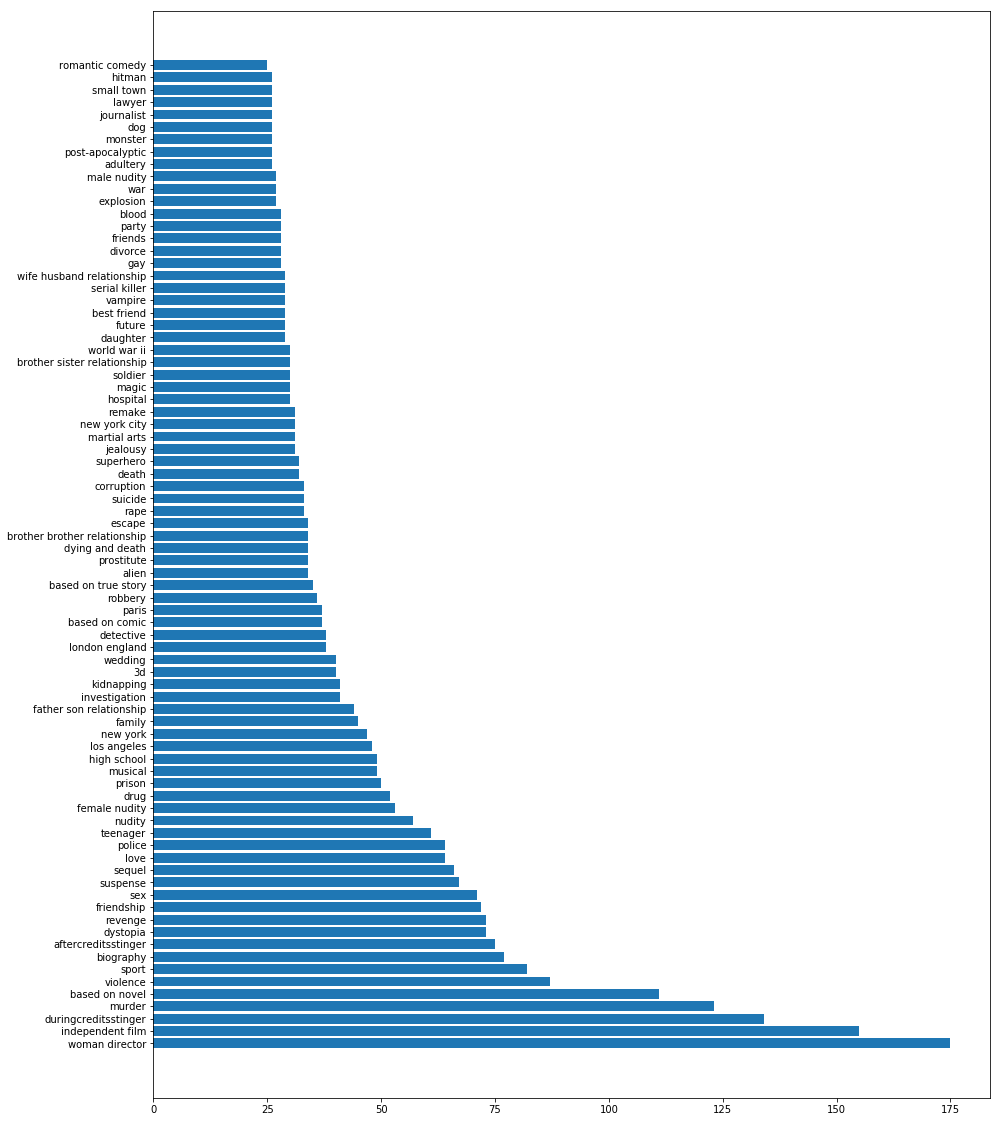

In [42]:
keywords = []
for item in list(train[train.Keywords.notna()]['Keywords']):
    item = json_to_dict(item)
    try:
        item = item['name']
        keywords.append(item)
    except:
        for it in item:
            try:
                it = it['name']
            except:
                pass
            keywords.append(it)
    
keywords = pd.DataFrame(keywords)
keywords = keywords[0].value_counts()[:80]
keywords = pd.DataFrame(keywords)
fig, ax = plt.subplots(figsize=(15,20))
ax.barh(keywords.index, keywords[0])
plt.show()

接著我們對keywords屬性與目標變數revenue作圖可以發現super hero這個關鍵字非常顯著的有很高的revenue。

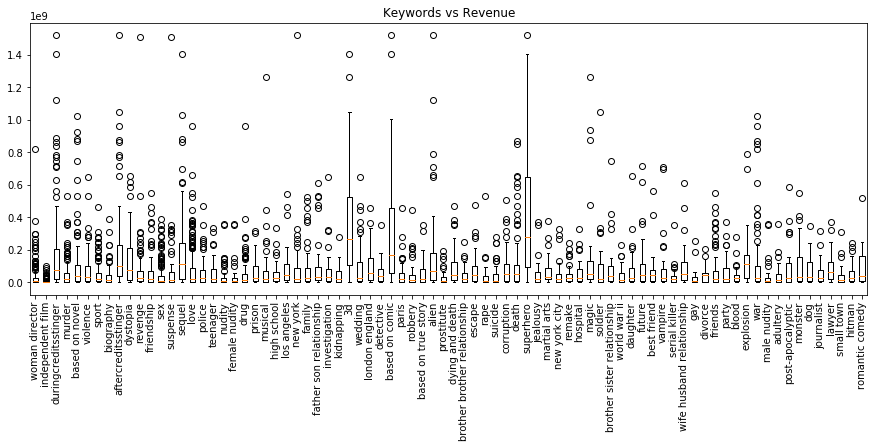

In [43]:
rev = []
non_nan = train[train.Keywords.notna()]
for item in list(keywords.index):
    rev.append(list(non_nan[non_nan.Keywords.str.contains(item)]['revenue']))
box(value=rev, title="Keywords vs Revenue", name=list(keywords.index))

針對cast屬性作圖，我們可以看出Robert De Niro出現的次數最為頻繁。

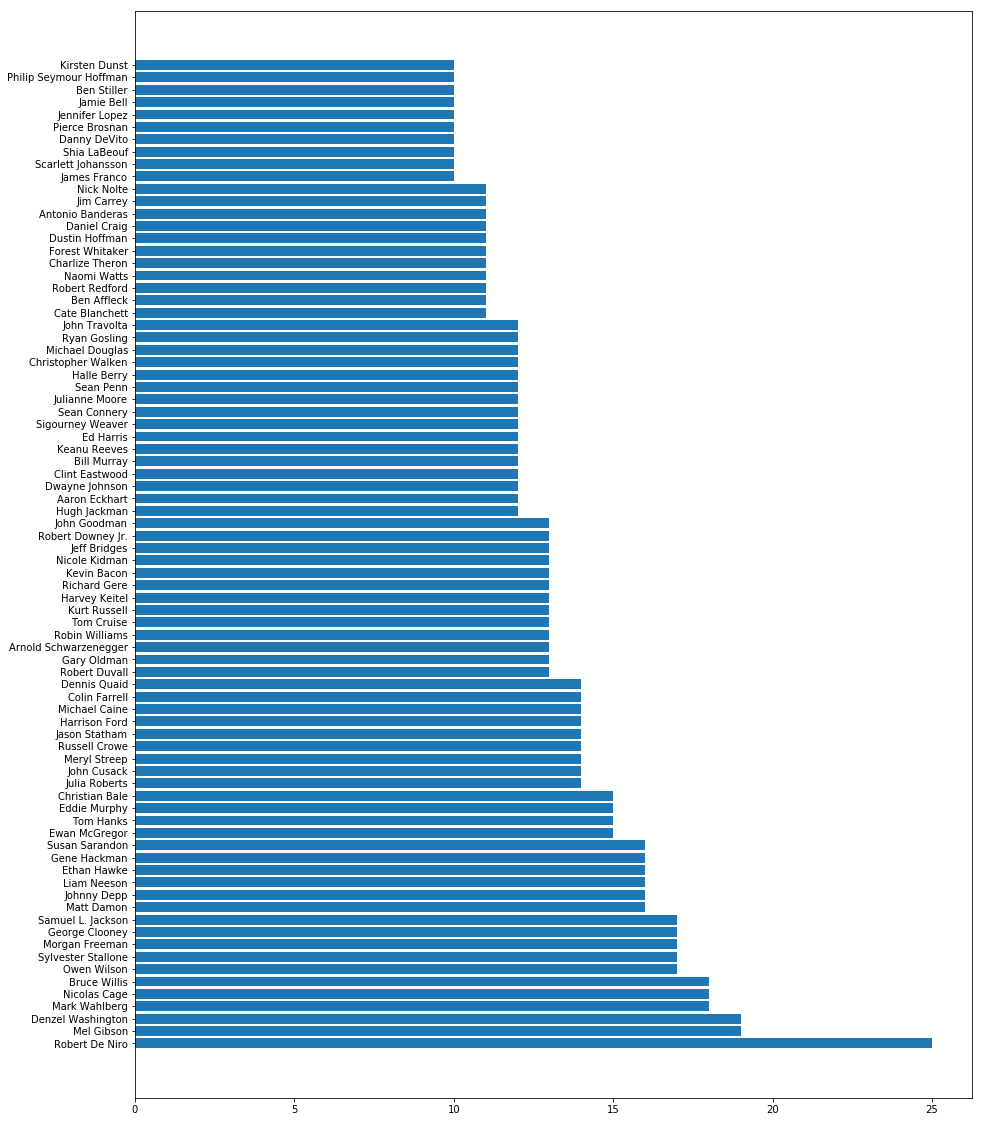

In [44]:
cast = []
total = []
for item in list(train['cast']):
    c = []
    try:
        item = json_to_dict(item)
        item = item[0:3]
        for e in item:
            c.append(e['name'])
    except:
        pass
    cast.append(c)
    total = total + c
    
total = pd.DataFrame(total)
total = total[0].value_counts()[:80]
total = pd.DataFrame(total)
fig, ax = plt.subplots(figsize = (15, 20))
ax.barh(total.index, total[0])
plt.show()

接著我們對cast屬性與目標變數revenue跟logged revenue作圖

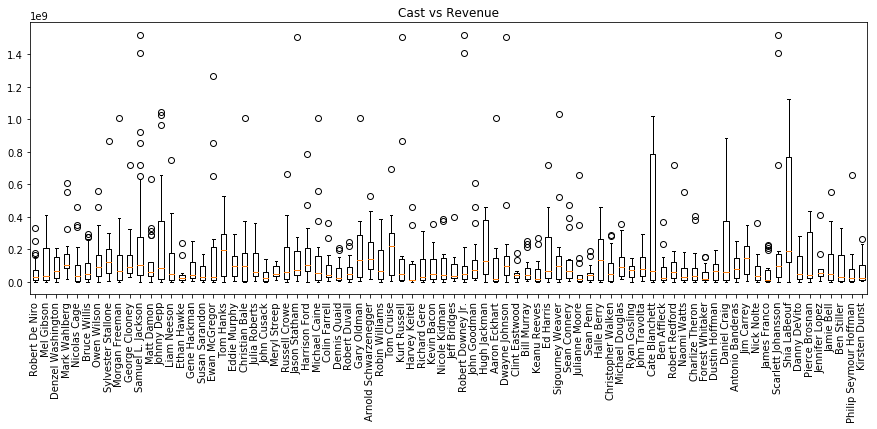

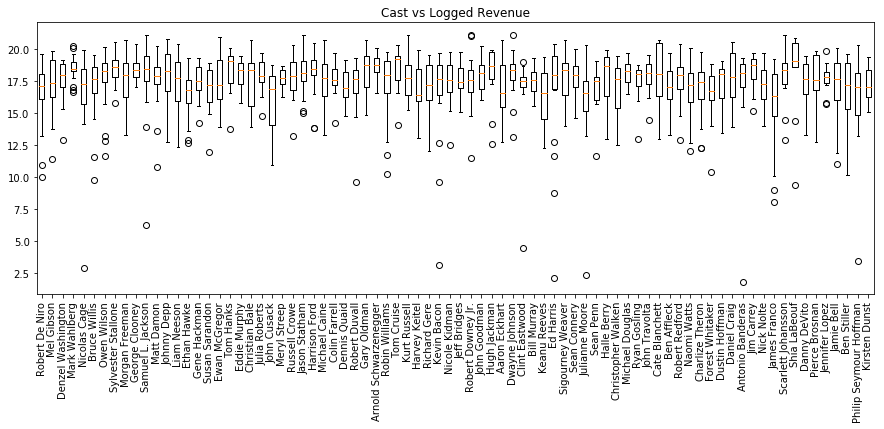

In [45]:
rev = []
non_nan = train[train.cast.notna()]
for item in list(total.index):
    rev.append(list(non_nan[non_nan.cast.str.contains(item)]['revenue']))
box(value=rev, title="Cast vs Revenue", name=list(total.index))

rev = []
for item in list(total.index):
    rev.append(list(non_nan[non_nan.cast.str.contains(item)]['Logged_Revenue']))
box(value=rev, title="Cast vs Logged Revenue", name=list(total.index))

我們還另外對一部電影的cast個數(number_cast)與目標變數revenue作圖，可以發現number_cast屬性對於目標變數並沒有顯著的線性關係存在。

In [46]:
num_cast = []
for item in list(train['cast']):
    try:
        item = json_to_dict(item)
        item = len(item)
        num_cast.append(item)
    except:
        num_cast.append(0)
train['number_cast'] = num_cast

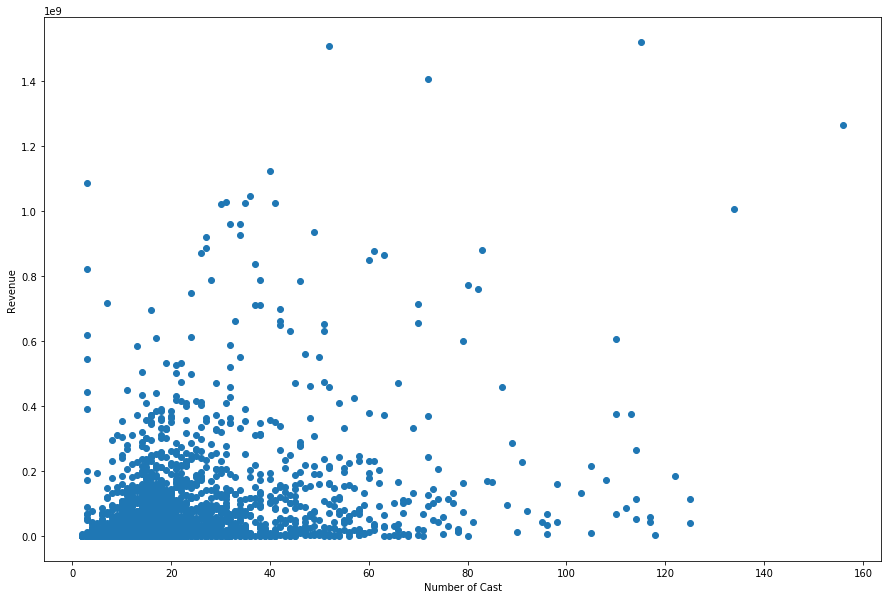

In [47]:
scatter(x_ = list(train['number_cast']), y_ = list(train['revenue']), x_title="Number of Cast", y_title="Revenue")

針對crew屬性的分布作圖，我們可以看到Ron Howard、Client EastWood是出現在最多部電影中的crew。

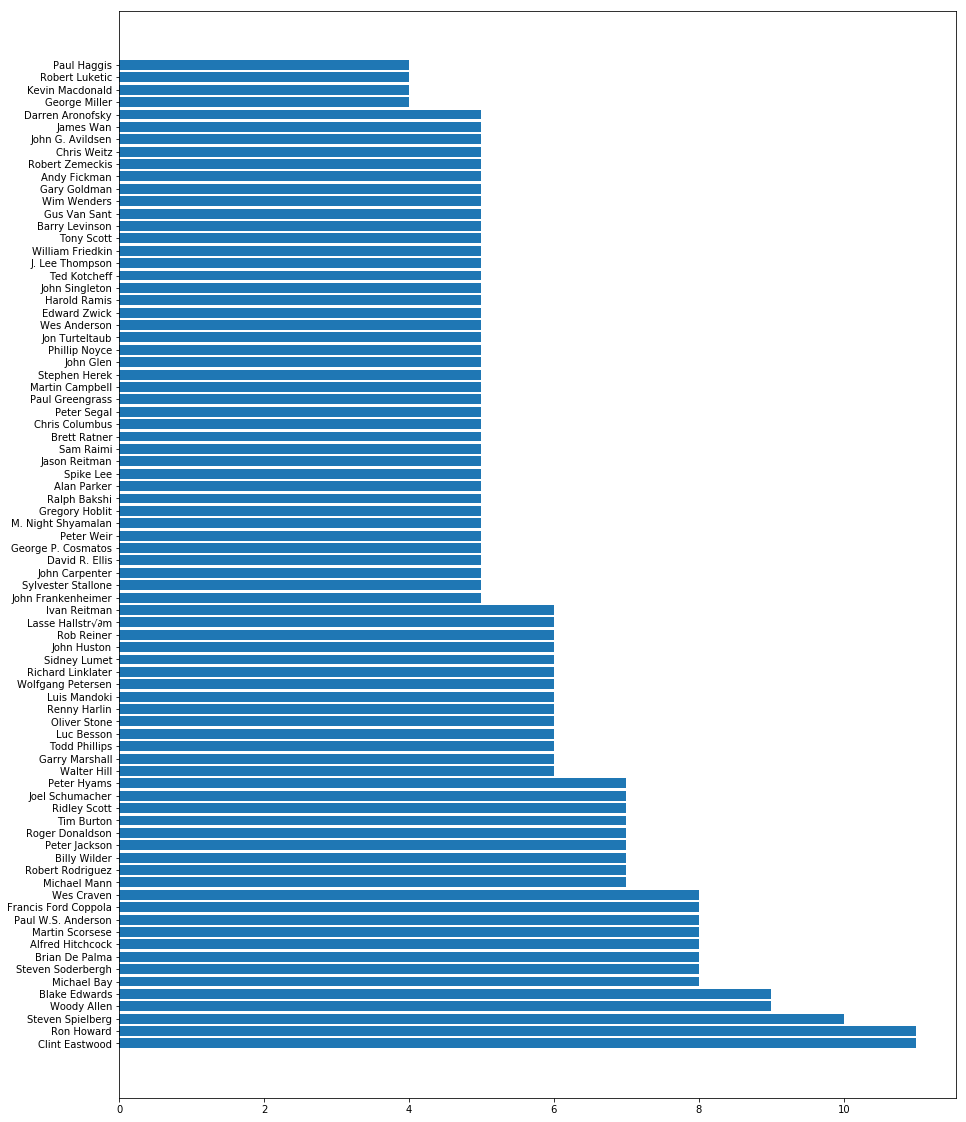

In [48]:
directors = []
gender_director = []
for item in list(train['crew']):
    item = json_to_dict(item)
    try:
        for element in item:
            if element['job'] == 'Director':
                directors.append(element['name'])
                gender_director.append(element['gender'])
                break
    except:
        directors.append("Others")
        gender_director.append(0)
train['Director'] = directors
train['Director_gender'] = gender_director

directors = pd.DataFrame(directors)
directors = directors[0].value_counts()[1:81]
directors = pd.DataFrame(directors)
fig, ax = plt.subplots(figsize = (15, 20))
ax.barh(directors.index, directors[0])
plt.show()

我們還另外討論導演性別(director_gender)與目標變數revenue跟logged revenue之間的關聯，下圖中1代表女性、2代表男性，我們可以看到男性導演通常指導的電影有較高的revenue

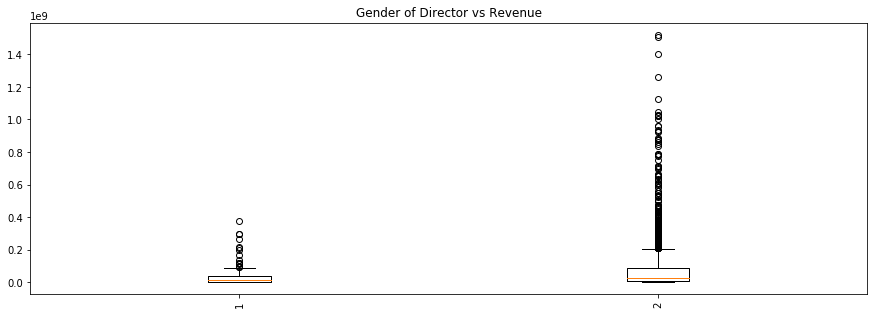

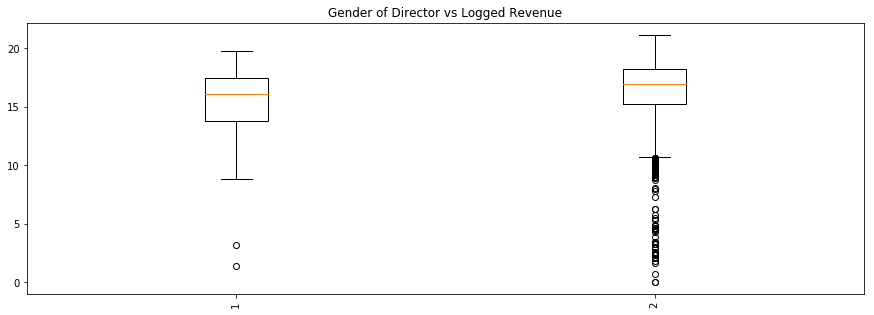

In [49]:
rev = []
non_nan = train[train.crew.notna()]
for item in range(1,3):
    rev.append(list(non_nan[non_nan.Director_gender == item]['revenue']))
box(value=rev, title="Gender of Director vs Revenue", name=list(range(1, 3)))

rev = []
for item in range(1,3):
    rev.append(list(non_nan[non_nan.Director_gender == item]['Logged_Revenue']))
box(value=rev, title="Gender of Director vs Logged Revenue", name=list(range(1, 3)))

我們還另外討論不同導演跟目標變數revenue與logged revenue之間的關聯，可以看到Peter Jackson這位導演製作的電影平均revenue最高。

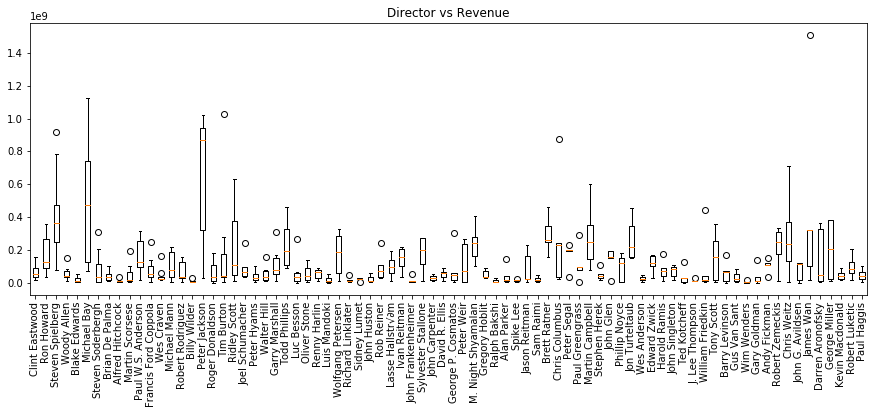

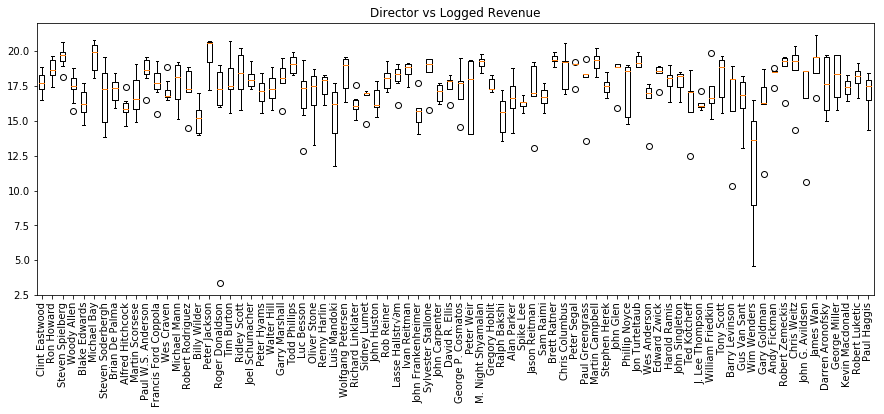

In [50]:
rev = []
non_nan = train[train.crew.notna()]
for item in list(directors.index):
    rev.append(list(non_nan[non_nan.Director == item]['revenue']))
box(value=rev, title="Director vs Revenue", name=list(directors.index))

rev = []
for item in list(directors.index):
    rev.append(list(non_nan[non_nan.Director == item]['Logged_Revenue']))
box(value=rev, title="Director vs Logged Revenue", name=list(directors.index))

針對revenue屬性，我們作圖觀察其分布發現revenue呈現右偏分布，因此我們對revenue取對數將它修正為接近常態分佈的形式。

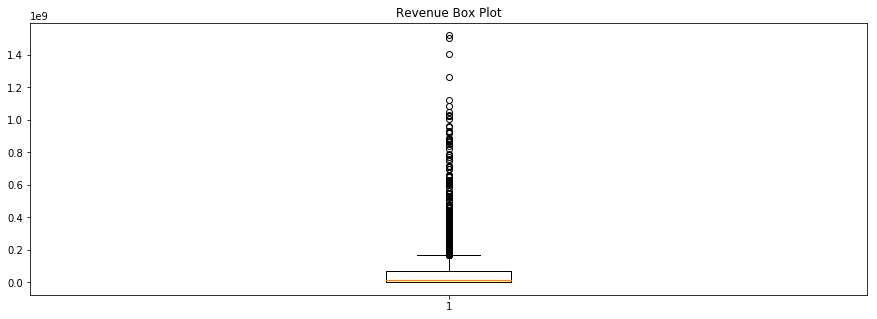

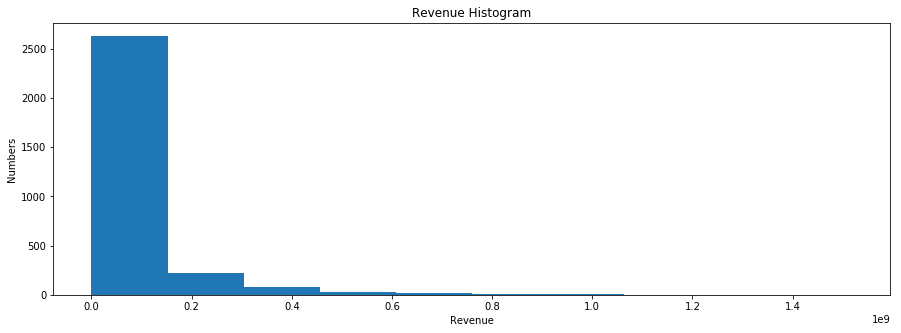

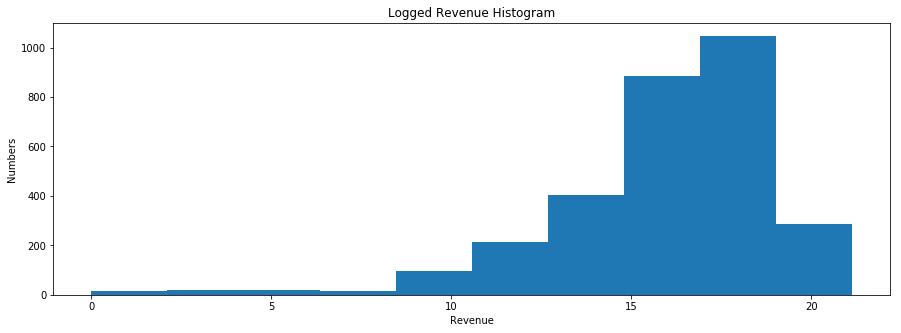

In [51]:
box(value = train.revenue, title = "Revenue Box Plot")
histogram(value = train.revenue, title = "Revenue Histogram", x_title = "Revenue", y_title = "Numbers")
histogram(value = [math.log(rev) for rev in list(train.revenue)], \
          title = "Logged Revenue Histogram", x_title = "Revenue", y_title = "Numbers")

最後我們製作出所有連續屬性的correlation熱度圖，可以發現budget屬性與目標變數revenue呈現高度的正相關，因此可以推斷該屬性是在做訓練模型時，重要的屬性。

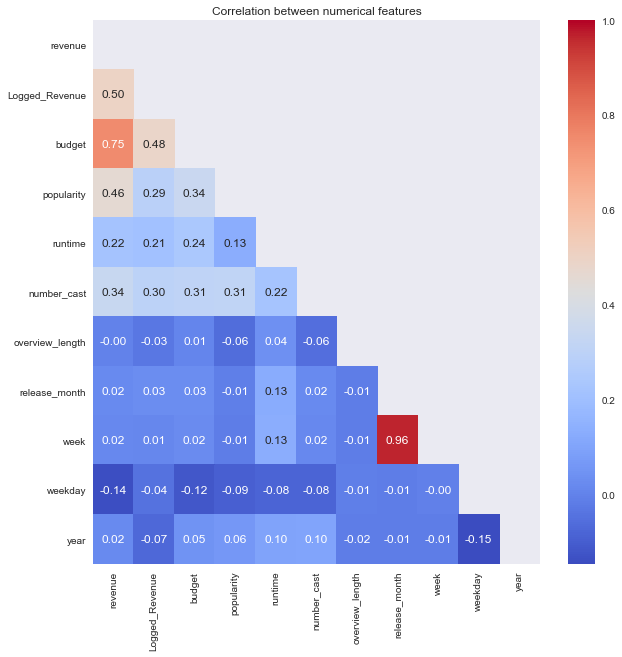

In [52]:
sns.set(rc={'figure.figsize':(10,10)})

# Compute the correlation matrix
corr = train[["revenue", "Logged_Revenue", "budget", "popularity", "runtime", "number_cast",\
              "overview_length", "release_month", "week", "weekday", "year"]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm')

plt.title("Correlation between numerical features")
plt.show()